## Trying to modify a PyTorch tutorial to suit our needs

In [1]:
%matplotlib inline

In [2]:
import gym
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple
from itertools import count
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T
from torch.autograd import Variable

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# Make a simple environment that satisfies openAI gym requirements
# Ref: https://towardsdatascience.com/creating-a-custom-openai-gym-environment-for-stock-trading-be532be3910e
# Ref: https://github.com/openai/gym/blob/master/docs/creating-environments.md
U_VELOCITY = 1
U_ACCELERATION = 2
O_VELOCITY = 1
O_ACCELERATION = 2

input_type = U_ACCELERATION
observe_type = O_VELOCITY
N = 10
env = gym.make('ConsensusEnv:ConsensusContEnv-v0', N=N, dt=0.1, Delta=0.05,
              input_type=input_type, observe_type=observe_type).unwrapped


### Replay Memory and other packages



### Test out functions to auto-run the training and testing

In [5]:
from utils.ReplayMemory import * 
from utils.networks import *
from utils.agents import *
from utils.plotting import *
from utils.train_test_methods import *

from importlib import reload
import utils
reload(utils.ReplayMemory)
reload(utils.networks)
reload(utils.agents)
reload(utils.plotting)
reload(utils.train_test_methods)

<module 'utils.agents' from '/Users/zz/Documents/GT20F/7000/GNN_experiments/utils/agents.py'>

In [109]:
reload(utils.ReplayMemory)
reload(utils.networks)
reload(utils.agents)
reload(utils.plotting)
reload(utils.train_test_methods)
from utils.ReplayMemory import * 
from utils.networks import *
from utils.agents import *
from utils.plotting import *
from utils.train_test_methods import *

In [6]:
na = env.na
ns = env.nf
hidden = 32

test_agents = [
    LearnerAgent(device, N, ns, na, hidden),
    RewardAgent(device, N, ns, na, hidden),
    RewardActionAgent(device, N, ns, na, hidden)
]

num_episode=5
test_interval=2
num_test=2
num_iteration=200
BATCH_SIZE=128
debug=True
num_sample=50

if input_type == U_ACCELERATION:
    action_space = [-env.a_max, env.a_max]
else:
    action_space = [-env.v_max, env.v_max]


In [114]:
# Test run
for agent in test_agents:
    train(agent, env, num_episode, test_interval, num_test, num_iteration, BATCH_SIZE, num_sample, action_space, debug)

Episode  0  finished; t =  199
Finished episode  0  with  199  steps, and rewards =  [-251.11914981 -291.36713243 -220.24629986 -237.88564374 -243.02959101
 -372.25400294 -265.6448024  -391.98667503 -321.9655733  -307.10024736] ;
cumulative reward =  -271310.589116754
Finished episode  1  with  199  steps, and rewards =  [-350.86176789 -384.78971752 -298.12004072 -405.14136268 -374.80127399
 -479.67580277 -383.49706958 -427.52902349 -263.57492306 -269.16934183] ;
cumulative reward =  -341555.8227882968
Episode  1  finished; t =  199
Episode  2  finished; t =  199
Finished episode  0  with  199  steps, and rewards =  [-441.87989561 -454.44968415 -635.27043628 -660.64520187 -433.35208989
 -635.10477321 -428.33539534 -388.6669188  -433.48192649 -529.32743464] ;
cumulative reward =  -453539.35288381006
Finished episode  1  with  199  steps, and rewards =  [-1486.52939612 -1099.55527799 -1486.45847416 -1008.37178213
 -1487.314863   -1017.43118255 -1221.08864964 -1052.20055909
 -1307.9215753

KeyboardInterrupt: 

In [7]:
# Real run
num_episode=500
test_interval=50
num_test=50
num_iteration=200
BATCH_SIZE=128
debug=False
num_sample=50

In [8]:
agent1 = LearnerAgent(device, N, ns, na, hidden)
a1hist = train(agent1, env, num_episode, test_interval, num_test, num_iteration, BATCH_SIZE, num_sample, action_space, debug)

torch.Size([512, 10])
torch.Size([128, 2]) torch.Size([128, 2])
torch.Size([128])
Test result at episode  0 : 
[11670944 22851341 10552915 13809098 24555918 15079090 14325343 23364668
 16339895 10500288 21806113 28963676  3195980  5124537 21684480 27241941
 22214581 11942504  6678488 11761867 28256092 20032965 22314105 12578549
 22325054 11040014 10526721    20057 28818431 26177918  6343697 25840821
 26960842 19284645 23850149 26106426 29453823 24683498 29858540 10862315
  1947615 21103977 24768013  3670832 28661599 25995140  8296426 14124755
 18612453  6946400]
Finished test  0  with  199 ; cumulative reward =  -21737.767219526984
Finished test  1  with  199 ; cumulative reward =  -23138.904772986796
Finished test  2  with  199 ; cumulative reward =  -21944.555375095126
Finished test  3  with  199 ; cumulative reward =  -23490.131114391294
Finished test  4  with  199 ; cumulative reward =  -23220.07612595622
Finished test  5  with  199 ; cumulative reward =  -21270.136516003833
Finish

In [9]:
env2 = gym.make('ConsensusEnv:ConsensusContEnv-v0', N=N, dt=0.1, Delta=0.05,
              input_type=input_type, observe_type=O_ACCELERATION).unwrapped
agent4 = LearnerAgent(device, N, env2.ns, env2.na, hidden)
a4hist = train(agent4, env2, num_episode, test_interval, num_test, num_iteration, BATCH_SIZE, num_sample, action_space, debug)

torch.Size([768, 10])
torch.Size([128, 2]) torch.Size([128, 2])
torch.Size([128])
Test result at episode  0 : 
[11670944 22851341 10552915 13809098 24555918 15079090 14325343 23364668
 16339895 10500288 21806113 28963676  3195980  5124537 21684480 27241941
 22214581 11942504  6678488 11761867 28256092 20032965 22314105 12578549
 22325054 11040014 10526721    20057 28818431 26177918  6343697 25840821
 26960842 19284645 23850149 26106426 29453823 24683498 29858540 10862315
  1947615 21103977 24768013  3670832 28661599 25995140  8296426 14124755
 18612453  6946400]
Finished test  0  with  199 ; cumulative reward =  -20796.263225169707
Finished test  1  with  199 ; cumulative reward =  -21025.023078709168
Finished test  2  with  199 ; cumulative reward =  -20876.447996794253
Finished test  3  with  199 ; cumulative reward =  -21818.59134550136
Finished test  4  with  199 ; cumulative reward =  -20995.508690545554
Finished test  5  with  199 ; cumulative reward =  -21464.042964419226
Finish

In [11]:
agent2 = RewardAgent(device, N, ns, na, hidden)
a2hist = train(agent2, env, num_episode, test_interval, num_test, num_iteration, BATCH_SIZE, num_sample, action_space, debug)

Test result at episode  0 : 
[11670944 22851341 10552915 13809098 24555918 15079090 14325343 23364668
 16339895 10500288 21806113 28963676  3195980  5124537 21684480 27241941
 22214581 11942504  6678488 11761867 28256092 20032965 22314105 12578549
 22325054 11040014 10526721    20057 28818431 26177918  6343697 25840821
 26960842 19284645 23850149 26106426 29453823 24683498 29858540 10862315
  1947615 21103977 24768013  3670832 28661599 25995140  8296426 14124755
 18612453  6946400]
Finished test  0  with  199 ; cumulative reward =  -20336.211513156093
Finished test  1  with  199 ; cumulative reward =  -22262.02724120323
Finished test  2  with  199 ; cumulative reward =  -21535.53928227894
Finished test  3  with  199 ; cumulative reward =  -22993.082674494824
Finished test  4  with  199 ; cumulative reward =  -21216.550847451177
Finished test  5  with  199 ; cumulative reward =  -20641.170899093828
Finished test  6  with  199 ; cumulative reward =  -24589.60224462276
Finished test  7  w

In [53]:
# Test if only controlling velocity would make matters worse
U_VELOCITY = 1
U_ACCELERATION = 2
O_VELOCITY = 1
O_ACCELERATION = 2

env3 = gym.make('ConsensusEnv:ConsensusContEnv-v0', N=N, dt=0.1, Delta=0.05,
              input_type=U_VELOCITY, observe_type=O_VELOCITY).unwrapped
env4 = gym.make('ConsensusEnv:ConsensusContEnv-v0', N=N, dt=0.1, Delta=0.05,
              input_type=U_VELOCITY, observe_type=O_ACCELERATION).unwrapped

agent5 = LearnerAgent(device, N, env3.no, env3.na, hidden)
a5hist = train(agent5, env3, num_episode, test_interval, num_test, num_iteration, BATCH_SIZE, num_sample, [-1,1], debug)
agent6 = LearnerAgent(device, N, env4.no, env4.na, hidden)
a6hist = train(agent6, env4, num_episode, test_interval, num_test, num_iteration, BATCH_SIZE, num_sample, [-1,1], debug)

torch.Size([512, 10])
torch.Size([128, 2]) torch.Size([128, 2])
torch.Size([128])
Test result at episode  0 : 
[11670944 22851341 10552915 13809098 24555918 15079090 14325343 23364668
 16339895 10500288 21806113 28963676  3195980  5124537 21684480 27241941
 22214581 11942504  6678488 11761867 28256092 20032965 22314105 12578549
 22325054 11040014 10526721    20057 28818431 26177918  6343697 25840821
 26960842 19284645 23850149 26106426 29453823 24683498 29858540 10862315
  1947615 21103977 24768013  3670832 28661599 25995140  8296426 14124755
 18612453  6946400]
Finished test  0  with  199 ; cumulative reward =  -29278.54525834409
Finished test  1  with  199 ; cumulative reward =  -30146.51186251955
Finished test  2  with  199 ; cumulative reward =  -20033.412096198663
Finished test  3  with  199 ; cumulative reward =  -22503.691350084766
Finished test  4  with  199 ; cumulative reward =  -29919.154767985285
Finished test  5  with  199 ; cumulative reward =  -20377.630837142846
Finishe

In [54]:
agent7 = RewardAgent(device, N, ns, na, hidden)
a7hist = train(agent7, env3, num_episode, test_interval, num_test, num_iteration, BATCH_SIZE, num_sample, 
               action_space=[-1,1], debug=debug)

Test result at episode  0 : 
[11670944 22851341 10552915 13809098 24555918 15079090 14325343 23364668
 16339895 10500288 21806113 28963676  3195980  5124537 21684480 27241941
 22214581 11942504  6678488 11761867 28256092 20032965 22314105 12578549
 22325054 11040014 10526721    20057 28818431 26177918  6343697 25840821
 26960842 19284645 23850149 26106426 29453823 24683498 29858540 10862315
  1947615 21103977 24768013  3670832 28661599 25995140  8296426 14124755
 18612453  6946400]
Finished test  0  with  199 ; cumulative reward =  -27851.6958886508
Finished test  1  with  199 ; cumulative reward =  -27293.392196122728
Finished test  2  with  199 ; cumulative reward =  -26666.232574375532
Finished test  3  with  199 ; cumulative reward =  -20857.258353263143
Finished test  4  with  199 ; cumulative reward =  -26870.38983379433
Finished test  5  with  199 ; cumulative reward =  -24354.133111135267
Finished test  6  with  199 ; cumulative reward =  -34940.978599921495
Finished test  7  w

In [37]:
env3.ns

6

In [14]:
agent3 = RewardActionAgent(device, N, ns, na, hidden)
a3hist = train(agent3, env, num_episode, test_interval, num_test, num_iteration, BATCH_SIZE, num_sample, action_space, debug)

Test result at episode  0 : 
[11670944 22851341 10552915 13809098 24555918 15079090 14325343 23364668
 16339895 10500288 21806113 28963676  3195980  5124537 21684480 27241941
 22214581 11942504  6678488 11761867 28256092 20032965 22314105 12578549
 22325054 11040014 10526721    20057 28818431 26177918  6343697 25840821
 26960842 19284645 23850149 26106426 29453823 24683498 29858540 10862315
  1947615 21103977 24768013  3670832 28661599 25995140  8296426 14124755
 18612453  6946400]
Finished test  0  with  199 ; cumulative reward =  -20554.620804997176
Finished test  1  with  199 ; cumulative reward =  -20169.921481016547
Finished test  2  with  199 ; cumulative reward =  -20422.521323221612
Finished test  3  with  199 ; cumulative reward =  -21053.594345245536
Finished test  4  with  199 ; cumulative reward =  -20898.14697697708
Finished test  5  with  199 ; cumulative reward =  -20607.76707072519
Finished test  6  with  199 ; cumulative reward =  -20035.033954649614
Finished test  7  

In [28]:
a1hist += train(agent1, env, num_episode, test_interval, num_test, num_iteration, BATCH_SIZE, num_sample, action_space, debug)
a2hist += train(agent2, env, num_episode, test_interval, num_test, num_iteration, BATCH_SIZE, num_sample, action_space, debug)
a4hist += train(agent4, env2, num_episode, test_interval, num_test, num_iteration, BATCH_SIZE, num_sample, action_space, debug)
a5hist += train(agent5, env3, num_episode, test_interval, num_test, num_iteration, BATCH_SIZE, num_sample, [-1,1], debug)
a6hist += train(agent6, env4, num_episode, test_interval, num_test, num_iteration, BATCH_SIZE, num_sample, [-1,1], debug)
a7hist += train(agent7, env3, num_episode, test_interval, num_test, num_iteration, BATCH_SIZE, num_sample, [-1,1], debug)

torch.Size([512, 10])
torch.Size([128, 2]) torch.Size([128, 2])
torch.Size([128])
Test result at episode  0 : 
[11670944 22851341 10552915 13809098 24555918 15079090 14325343 23364668
 16339895 10500288 21806113 28963676  3195980  5124537 21684480 27241941
 22214581 11942504  6678488 11761867 28256092 20032965 22314105 12578549
 22325054 11040014 10526721    20057 28818431 26177918  6343697 25840821
 26960842 19284645 23850149 26106426 29453823 24683498 29858540 10862315
  1947615 21103977 24768013  3670832 28661599 25995140  8296426 14124755
 18612453  6946400]
Finished test  0  with  180 ; cumulative reward =  -15539.769024204814
Finished test  1  with  176 ; cumulative reward =  -14420.51726900786
Finished test  2  with  101 ; cumulative reward =  -5596.802436068438
Finished test  3  with  182 ; cumulative reward =  -20517.099751281556
Finished test  4  with  169 ; cumulative reward =  -18401.39290852784
Finished test  5  with  156 ; cumulative reward =  -17267.438473778762
Finished

AssertionError: Action vector [[-0.20101929 -4.7207785  -3.1607018  -1.5658379  -2.4046059  -0.5682163
  -1.3926945  -2.5421886  -5.999345   -1.391922  ]
 [-4.2077427  -2.3900719  -0.28086853  0.6892185  -5.794113    0.6629658
  -4.7904034  -4.440776   -3.624014   -3.009304  ]] is invalid

In [57]:
len(a5hist),len(a6hist),len(a7hist)
a5hist += train(agent5, env3, num_episode, test_interval, num_test, num_iteration, BATCH_SIZE, num_sample, [-1,1], debug)
a6hist += train(agent6, env4, num_episode, test_interval, num_test, num_iteration, BATCH_SIZE, num_sample, [-1,1], debug)
a7hist += train(agent7, env3, num_episode, test_interval, num_test, num_iteration, BATCH_SIZE, num_sample, [-1,1], debug)

torch.Size([512, 10])
torch.Size([128, 2]) torch.Size([128, 2])
torch.Size([128])
Test result at episode  0 : 
[11670944 22851341 10552915 13809098 24555918 15079090 14325343 23364668
 16339895 10500288 21806113 28963676  3195980  5124537 21684480 27241941
 22214581 11942504  6678488 11761867 28256092 20032965 22314105 12578549
 22325054 11040014 10526721    20057 28818431 26177918  6343697 25840821
 26960842 19284645 23850149 26106426 29453823 24683498 29858540 10862315
  1947615 21103977 24768013  3670832 28661599 25995140  8296426 14124755
 18612453  6946400]
Finished test  0  with  17 ; cumulative reward =  -129.4990132401561
Finished test  1  with  14 ; cumulative reward =  -133.4140257376106
Finished test  2  with  13 ; cumulative reward =  -90.76374379697089
Finished test  3  with  14 ; cumulative reward =  -94.15317818670924
Finished test  4  with  13 ; cumulative reward =  -103.4193636274429
Finished test  5  with  12 ; cumulative reward =  -57.816205283873465
Finished test  6

In [110]:
agent8 = GradientAgent(device, N, ns, hidden)
a8hist = train(agent8, env3, 500, 50, 1, 200, BATCH_SIZE, num_sample, action_space, debug)

tensor(2.2934, grad_fn=<MeanBackward0>)
Test result at episode  0 : 
[11670944]
Finished test  0  with  199 ; cumulative reward =  -23131.161090484653
tensor(0.6709, grad_fn=<MeanBackward0>)
tensor(0.5004, grad_fn=<MeanBackward0>)
tensor(0.5282, grad_fn=<MeanBackward0>)
tensor(0.6610, grad_fn=<MeanBackward0>)
tensor(0.4842, grad_fn=<MeanBackward0>)
tensor(0.5773, grad_fn=<MeanBackward0>)
tensor(0.3061, grad_fn=<MeanBackward0>)
tensor(1.2845, grad_fn=<MeanBackward0>)
tensor(0.5212, grad_fn=<MeanBackward0>)
tensor(0.4452, grad_fn=<MeanBackward0>)
tensor(0.4692, grad_fn=<MeanBackward0>)
tensor(0.4466, grad_fn=<MeanBackward0>)
tensor(0.3852, grad_fn=<MeanBackward0>)
tensor(0.2790, grad_fn=<MeanBackward0>)
tensor(0.3352, grad_fn=<MeanBackward0>)
tensor(0.2941, grad_fn=<MeanBackward0>)
tensor(0.6157, grad_fn=<MeanBackward0>)
tensor(0.3295, grad_fn=<MeanBackward0>)
tensor(0.4422, grad_fn=<MeanBackward0>)
tensor(0.6081, grad_fn=<MeanBackward0>)
tensor(0.3457, grad_fn=<MeanBackward0>)
tensor(0.

In [105]:
a8hist += train(agent8, env3, 200, 50, 15, 200, BATCH_SIZE, num_sample, action_space, debug)

tensor(0.3074, grad_fn=<MeanBackward0>)
Test result at episode  0 : 
[11670944 22851341 10552915 13809098 24555918 15079090 14325343 23364668
 16339895 10500288 21806113 28963676  3195980  5124537 21684480]
Finished test  0  with  199 ; cumulative reward =  -21960.946199134985
Finished test  1  with  199 ; cumulative reward =  -24769.53731136637
Finished test  2  with  199 ; cumulative reward =  -30834.73626977995
Finished test  3  with  199 ; cumulative reward =  -21540.468723485912
Finished test  4  with  199 ; cumulative reward =  -42308.546031808626
Finished test  5  with  199 ; cumulative reward =  -24112.378794576172
Finished test  6  with  199 ; cumulative reward =  -21133.60166126826
Finished test  7  with  199 ; cumulative reward =  -21585.492647154508
Finished test  8  with  199 ; cumulative reward =  -22365.539208364655
Finished test  9  with  199 ; cumulative reward =  -24731.5593823677
Finished test  10  with  199 ; cumulative reward =  -26471.21347640018
Finished test  11

Finished episode  0  with  79 ;
cumulative reward =  -8282.841415046541
Finished episode  1  with  79 ;
cumulative reward =  -7626.9262283860535


[[array([-4.64429276, -2.88045821, -2.72349281, -3.29383552, -4.48805322,
         -4.38575598, -2.96879011, -3.58967122, -3.57246066, -3.44592356]),
  array([-4.26489098, -2.58490534, -2.43322967, -3.04041837, -4.29623401,
         -3.79294164, -2.59320008, -3.40923316, -3.43925926, -2.9775142 ]),
  array([-3.90682438, -2.44341329, -2.26280542, -2.85232595, -4.29323616,
         -3.19046818, -2.31129969, -3.18688052, -3.42413711, -2.75970094]),
  array([-3.37993157, -2.27419451, -2.22085741, -2.74023229, -4.27643854,
         -2.97446194, -2.1371576 , -2.64400312, -3.57860209, -2.59982553]),
  array([-3.01914957, -2.24328042, -2.26662591, -2.76686059, -4.31305631,
         -2.95598449, -2.15529617, -2.5258348 , -3.73649632, -2.49644102]),
  array([-3.02485101, -2.28748585, -2.50562844, -2.94070914, -4.42996886,
         -3.24211592, -2.33737882, -2.52592267, -3.86140779, -2.76482426]),
  array([-2.85943783, -2.35757892, -2.72717116, -2.99448856, -4.55967882,
         -3.58313033, -2.5

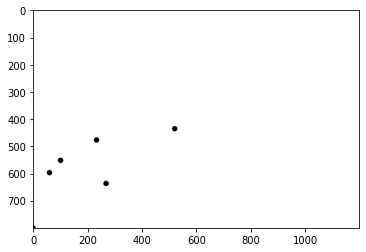

In [111]:
plot_test(agent8, env3, fnames=['GradientAgent_1', 'GradientAgent_2'], 
          num_iteration=80, action_space=action_space, imdir='screencaps/')

In [64]:
agent1.save_model('test3_LA-uAcc-oVel')
agent2.save_model('test3_RA-uAcc-oVel')
agent3.save_model('test3_RAA')
agent4.save_model('test3_LA-uAcc-oAcc')
agent5.save_model('test3_LA-uVel-oVel')
agent6.save_model('test3_LA-uVel-oAcc')
agent7.save_model('test3_RA-uVel-oVel')

Saving model to models/LearnerAgent_test3_LA-uAcc-oVel
Saving model to models/RewardAgent_test3_RA-uAcc-oVel
Saving model to models/RewardActionAgent_test3_RAA
Saving model to models/LearnerAgent_test3_LA-uAcc-oAcc
Saving model to models/LearnerAgent_test3_LA-uVel-oVel
Saving model to models/LearnerAgent_test3_LA-uVel-oAcc
Saving model to models/RewardAgent_test3_RA-uVel-oVel


In [112]:
agent8.save_model('test3_GA')

Saving model to models/GradientAgent_test3_GA


In [37]:
agent1.load_model('test2_LA-uAcc-oVel')
agent2.load_model('test2_RA-uAcc-oVel')
agent3.load_model('test2_RAA')
agent4.load_model('test2_LA-uAcc-oAcc')
agent5.load_model('test2_LA-uVel-oVel')
agent6.load_model('test2_LA-uVel-oAcc')
agent7.load_model('test2_RA-uVel-oVel')

Loading model from test2_LA-uAcc-oVel


NameError: name 'actor_path' is not defined

In [1]:
agent8 = GradientAgent(device, N, ns, hidden)
agent8.load_model('models/GradientAgent_test3_GA')

NameError: name 'agent8' is not defined

## Plot your result

In [15]:
# Run with baseline (e.g. expert)
def run_expert(env, num_iteration=200, seed=2020):
    reward_hist_hst = []
    N=env.N
    np.random.seed(seed)
    env_seeds = np.random.randint(0, 31102528, size=1)
    print(env_seeds)
    
    steps = 0
    cum_reward = 0
    reward_hist = []

    np.random.seed(env_seeds[0])
    state = env.reset()
    state = torch.from_numpy(state).float()
    env.render()

    for t in range(num_iteration):
        action = env.controller()
        next_state, reward, done, _ = env.step(action)
        state = next_state
        cum_reward += sum(reward)
        reward_hist.append(reward)
        steps += 1
        if done:
            break
    print("Finished expert run with ", t, " steps, and cumulative reward = ", cum_reward)
    reward_hist_hst.append(reward_hist)
    return reward_hist_hst

In [16]:
# Randomly give a test
def plot_test(agent, env, fnames=[], num_iteration=100, action_space=[-1,1], imdir=''):
    reward_hist_hst = []
    N=env.N
    for e,f in enumerate(fnames):
        steps = 0
        agent.net.eval()
        cum_reward = 0
        reward_hist = []

        state = env.reset()
        state = torch.from_numpy(state).float()
        state = Variable(state)
        env.render()

        for t in range(num_iteration):  
            # Try to pick an action, react, and store the resulting behavior in the pool here
            actions = []
            for i in range(N):
                action = agent.select_action(state[i], **{
                    'steps_done':t, 'rand':False, 'num_sample':50, 'action_space':action_space
                })
                actions.append(action)
            action = np.array(actions).T 

            next_state, reward, done, _ = env.step(action)
            next_state = Variable(torch.from_numpy(next_state).float()) # The float() probably avoids bug in net.forward()
            state = next_state
            cum_reward += sum(reward)
            reward_hist.append(reward)

            if len(f) > 0:
                img = env.render(mode="rgb_array")
                plt.imshow(img)
                plt.savefig(imdir + f + '-{:03d}.jpg'.format(t))
            steps += 1

            if done:
                print("Took ", t, " steps to converge")
                break
        print("Finished episode ", e, " with ", t, #" steps, and rewards = ", reward, 
              ";\ncumulative reward = ", cum_reward)
        reward_hist_hst.append(reward_hist)
    return reward_hist_hst

In [31]:
extest = run_expert(env)

[8168288]
Finished expert run with  18  steps, and cumulative reward =  -61.375266435410765


In [32]:
h1test = plot_test(agent1, env, fnames=['']*50,
#           fnames=['LearnerAgent_acc_test1', 'LearnerAgent_acc_test2'], 
          num_iteration=num_iteration, action_space=action_space, imdir='screencaps/')

Took  113  steps to converge
Finished episode  0  with  113 ;
cumulative reward =  -8873.89740714649
Took  107  steps to converge
Finished episode  1  with  107 ;
cumulative reward =  -11463.135598650557
Took  119  steps to converge
Finished episode  2  with  119 ;
cumulative reward =  -9889.46743137034
Took  123  steps to converge
Finished episode  3  with  123 ;
cumulative reward =  -6648.346122606459
Took  118  steps to converge
Finished episode  4  with  118 ;
cumulative reward =  -15620.447780519082
Took  74  steps to converge
Finished episode  5  with  74 ;
cumulative reward =  -5864.889397691502
Took  122  steps to converge
Finished episode  6  with  122 ;
cumulative reward =  -14296.1798834792
Took  108  steps to converge
Finished episode  7  with  108 ;
cumulative reward =  -16104.397099600548
Took  104  steps to converge
Finished episode  8  with  104 ;
cumulative reward =  -14761.096886113342
Took  78  steps to converge
Finished episode  9  with  78 ;
cumulative reward =  -6

In [33]:
h2test = plot_test(agent2, env, fnames=['']*50, 
#           fnames=['RewardAgent_acc_test1', 'RewardAgent_acc_test2'], 
          num_iteration=num_iteration, action_space=action_space, imdir='screencaps/')

Finished episode  0  with  199 ;
cumulative reward =  -835.478149492353
Finished episode  1  with  199 ;
cumulative reward =  -740.7950867790156
Finished episode  2  with  199 ;
cumulative reward =  -753.8770753449106
Finished episode  3  with  199 ;
cumulative reward =  -731.617449254692
Finished episode  4  with  199 ;
cumulative reward =  -823.8744252955752
Finished episode  5  with  199 ;
cumulative reward =  -725.2746672986648
Finished episode  6  with  199 ;
cumulative reward =  -750.5402368902277
Finished episode  7  with  199 ;
cumulative reward =  -713.1851724375758
Finished episode  8  with  199 ;
cumulative reward =  -770.3454903936986
Finished episode  9  with  199 ;
cumulative reward =  -638.0205512193722
Finished episode  10  with  199 ;
cumulative reward =  -851.0427984289028
Finished episode  11  with  199 ;
cumulative reward =  -672.6339335977983
Finished episode  12  with  199 ;
cumulative reward =  -699.2870308448086
Finished episode  13  with  199 ;
cumulative rewar

In [34]:
h3test = plot_test(agent3, env, fnames=['']*50, 
#           fnames=['RewardActionAgent_acc_test1'], 
          num_iteration=num_iteration, action_space=action_space, imdir='screencaps/')

Finished episode  0  with  199 ;
cumulative reward =  -20440.314257145255
Finished episode  1  with  199 ;
cumulative reward =  -20212.989895982806
Finished episode  2  with  199 ;
cumulative reward =  -20536.22680446389
Finished episode  3  with  199 ;
cumulative reward =  -20497.423325831034
Finished episode  4  with  199 ;
cumulative reward =  -19910.457658965148
Finished episode  5  with  199 ;
cumulative reward =  -20094.731049783197
Finished episode  6  with  199 ;
cumulative reward =  -19826.742194020488
Finished episode  7  with  199 ;
cumulative reward =  -20514.523824652555
Finished episode  8  with  199 ;
cumulative reward =  -20258.103825229966
Finished episode  9  with  199 ;
cumulative reward =  -19903.60013354882
Finished episode  10  with  199 ;
cumulative reward =  -20085.187456187952
Finished episode  11  with  199 ;
cumulative reward =  -20234.47496467951
Finished episode  12  with  199 ;
cumulative reward =  -19916.261705499648
Finished episode  13  with  199 ;
cumu

In [35]:
h4test = plot_test(agent4, env2, fnames=['']*50, 
#           fnames=['LearnerAgent_acc_oacc_test1', 'LearnerAgent_acc_oacc_test2'], 
          num_iteration=num_iteration, action_space=action_space, imdir='screencaps/')

Finished episode  0  with  199 ;
cumulative reward =  -6091.967804730051
Finished episode  1  with  199 ;
cumulative reward =  -10783.532722350898
Finished episode  2  with  199 ;
cumulative reward =  -7398.780011312278
Finished episode  3  with  199 ;
cumulative reward =  -3808.8946015034803
Finished episode  4  with  199 ;
cumulative reward =  -1642.3446600184632
Finished episode  5  with  199 ;
cumulative reward =  -5116.468447307758
Finished episode  6  with  199 ;
cumulative reward =  -7872.22533207785
Finished episode  7  with  199 ;
cumulative reward =  -5328.36447793722
Finished episode  8  with  199 ;
cumulative reward =  -8481.163554947945
Finished episode  9  with  199 ;
cumulative reward =  -7416.6234820770005
Finished episode  10  with  199 ;
cumulative reward =  -5580.734115393466
Finished episode  11  with  199 ;
cumulative reward =  -2494.8036312170134
Finished episode  12  with  199 ;
cumulative reward =  -5175.873802877355
Finished episode  13  with  199 ;
cumulative 

In [60]:
h5test = plot_test(agent5, env3, fnames=['']*50, 
#           fnames=['LearnerAgent_uvel_ovel_test1', 'LearnerAgent_uvel_ovel_test2'], 
          num_iteration=num_iteration, action_space=[-1,1], imdir='screencaps/')

Took  12  steps to converge
Finished episode  0  with  12 ;
cumulative reward =  -48.30291873104535
Took  13  steps to converge
Finished episode  1  with  13 ;
cumulative reward =  -101.67052152472363
Took  17  steps to converge
Finished episode  2  with  17 ;
cumulative reward =  -98.7646199272231
Took  14  steps to converge
Finished episode  3  with  14 ;
cumulative reward =  -127.55402196908528
Took  13  steps to converge
Finished episode  4  with  13 ;
cumulative reward =  -75.0271897241452
Took  12  steps to converge
Finished episode  5  with  12 ;
cumulative reward =  -55.60247638581472
Took  14  steps to converge
Finished episode  6  with  14 ;
cumulative reward =  -86.59193856742465
Took  15  steps to converge
Finished episode  7  with  15 ;
cumulative reward =  -146.7364772818245
Took  13  steps to converge
Finished episode  8  with  13 ;
cumulative reward =  -68.2977653013491
Took  12  steps to converge
Finished episode  9  with  12 ;
cumulative reward =  -58.46944603916202
T

In [61]:
h6test = plot_test(agent6, env4, fnames=['']*50, 
#           fnames=['LearnerAgent_uvel_oacc_test1', 'LearnerAgent_uvel_oacc_test2'], 
          num_iteration=num_iteration, action_space=[-1,1], imdir='screencaps/')

Finished episode  0  with  199 ;
cumulative reward =  -4280.228228758999
Finished episode  1  with  199 ;
cumulative reward =  -1773.4064348131799
Finished episode  2  with  199 ;
cumulative reward =  -57.08006494780327
Finished episode  3  with  199 ;
cumulative reward =  -1089.7344147925592
Finished episode  4  with  199 ;
cumulative reward =  -2746.0277703767556
Finished episode  5  with  199 ;
cumulative reward =  -1576.1353624611827
Finished episode  6  with  199 ;
cumulative reward =  -271.5512753901113
Finished episode  7  with  199 ;
cumulative reward =  -1573.1566917111977
Finished episode  8  with  199 ;
cumulative reward =  -2753.0108746660408
Finished episode  9  with  199 ;
cumulative reward =  -2481.163832081338
Finished episode  10  with  199 ;
cumulative reward =  -3709.573339926361
Finished episode  11  with  199 ;
cumulative reward =  -3285.49631873651
Finished episode  12  with  199 ;
cumulative reward =  -393.19203515983315
Finished episode  13  with  199 ;
cumulati

In [62]:
h7test = plot_test(agent7, env3, fnames=['']*50, 
#           fnames=['RewardAgent_uvel_ovel_test1', 'RewardAgent_uvel_ovel_test2'], 
          num_iteration=num_iteration, action_space=[-1,1], imdir='screencaps/')

Finished episode  0  with  199 ;
cumulative reward =  -574.4661583773236
Finished episode  1  with  199 ;
cumulative reward =  -5892.509256509221
Finished episode  2  with  199 ;
cumulative reward =  -513.7108325394267
Finished episode  3  with  199 ;
cumulative reward =  -554.1418814240292
Finished episode  4  with  199 ;
cumulative reward =  -543.8757661181198
Finished episode  5  with  199 ;
cumulative reward =  -559.4918287310169
Finished episode  6  with  199 ;
cumulative reward =  -541.2528544570207
Finished episode  7  with  199 ;
cumulative reward =  -587.3517213258385
Finished episode  8  with  199 ;
cumulative reward =  -648.6415390049793
Finished episode  9  with  199 ;
cumulative reward =  -626.3785812006336
Finished episode  10  with  199 ;
cumulative reward =  -586.0790410717734
Finished episode  11  with  199 ;
cumulative reward =  -717.0218445364418
Finished episode  12  with  199 ;
cumulative reward =  -603.9114748552361
Finished episode  13  with  199 ;
cumulative rew

In [56]:
# Plots out reward history data
def plot_reward_hist(reward_hists=[], ep_int=25, hist_names=[], log=True, num_iteration=0):
    # reward_hist : List of histories of reward histories
    # ep_int : number of episodes / size of intervals between two history lists
    # reward_hist = [ [ [ [agent 1's reward history for 1st run in ep=0],
    #                     [agent 1's reward history for 2nd run in ep=0],... ],
    #                   [ [agent 1's reward history for 1st run in ep=25],
    #                     [agent 1's reward history for 2nd run in ep=25],... ],... ],
    #                 [ same bunch of lists for agent 2 ], ...  ]
    fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12,7))
    fig.suptitle('Top: Mean reward; Bottom: Iteration before done')

    if num_iteration > 0:
        max_num_iteration = num_iteration
    else:
        max_num_iteration = max([max(max_num_iteration, max([max([len(h) for h in hh]) for hh in hhh])) for hhh in reward_hists])
    
    for i,hhh in enumerate(reward_hists):
        num_ep = np.arange(len(hhh))*ep_int
        if log:
            re_avg = [ np.log(-1/np.mean([sum(h) for h in hh])) for hh in hhh ] # Mean of cumulative rewards for each ep
        else:
            re_avg = [ np.mean([sum(h) for h in hh]) for hh in hhh ] # Mean of cumulative rewards for each ep
        it_avg = [ np.mean([len(h) for h in hh]) for hh in hhh ] # Total number of iteartions for each ep
        max_iter_count = [ [len(h) for h in hh].count(max_num_iteration) for hh in hhh ]
        
        wid = 1 / len(hist_names) * 0.8 * ep_int
        offset = i * wid - 0.4 * ep_int
        ax1.bar(num_ep+offset, re_avg, label=hist_names[i], width=wid)
        ax2.bar(num_ep+offset, it_avg, label=hist_names[i], width=wid)
        ax3.bar(num_ep+offset, max_iter_count, label=hist_names[i], width=wid)
#     ax2.title.set_text('# of episodes trained')
    log_txt = ''
    if log:
        log_txt = 'Log '
    ax1.set_ylabel(log_txt+'Reward history (average)')
    ax2.set_ylabel('# of iterations (average)')
    ax3.set_ylabel('# of runs failed to converge')
#     ax1.set_xlabel('Reward')
    ax3.set_xlabel('# of episodes trained')
    ax2.legend(bbox_to_anchor=(1.05, 1)) # https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
    ax1.legend(bbox_to_anchor=(1.05, 1))
    ax3.legend(bbox_to_anchor=(1.05, 1))

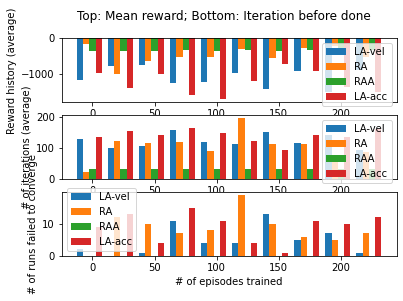

In [35]:
plot_reward_hist([a1hist, a2hist, a3hist, a4hist], 25, ['LA-vel','RA','RAA','LA-acc'], log=False, num_iteration=num_iteration)

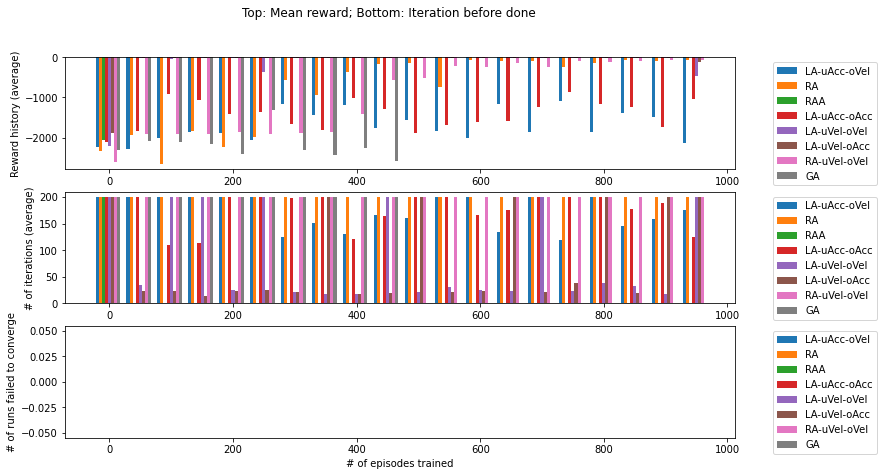

In [113]:
plot_reward_hist([a1hist, a2hist, a3hist, a4hist, a5hist, a6hist, a7hist], 50, 
                 ['LA-uAcc-oVel','RA','RAA','LA-uAcc-oAcc','LA-uVel-oVel','LA-uVel-oAcc','RA-uVel-oVel'], 
                 log=False, num_iteration=num_iteration)

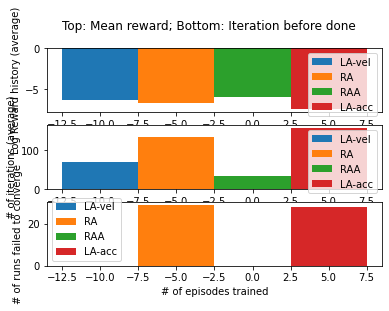

In [34]:
plot_reward_hist([[h1test], [h2test], [h3test], [h4test]], 25, ['LA-vel','RA','RAA','LA-acc'], num_iteration=num_iteration)

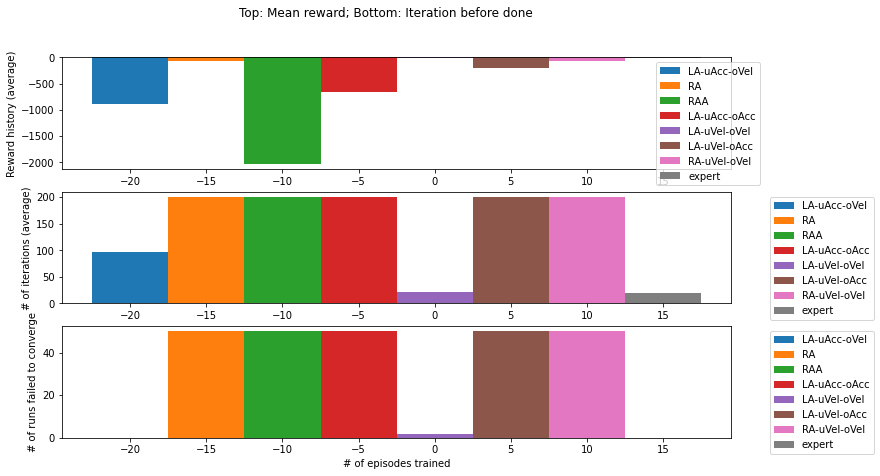

In [63]:
plot_reward_hist([[h1test], [h2test], [h3test], [h4test], [h5test], [h6test], [h7test], [extest]], 50, 
                 ['LA-uAcc-oVel','RA','RAA','LA-uAcc-oAcc','LA-uVel-oVel','LA-uVel-oAcc','RA-uVel-oVel','expert'], 
                 log=False, num_iteration=num_iteration)

In [58]:
len(a5hist),len(a6hist),len(a7hist)

(20, 20, 20)

In [21]:
def testfunc(a,b,**k):
    print(a,b)
    c = k.get('c',10)
    print(c)

testfunc(1,2,**{'c':9})

1 2
9


In [8]:
# Copy some of the methods from the original documentatoin here, because useful
BATCH_SIZE = 128
GAMMA = 0.999
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 100
TARGET_UPDATE = 10
n_actions = 5

# policy_net = DQN(screen_height, screen_width, n_actions).to(device)
# target_net = DQN(screen_height, screen_width, n_actions).to(device)
# target_net.load_state_dict(policy_net.state_dict())
# target_net.eval()

# Throws a coin to decide whether to randomly sample or to choose according to reward.
# Coin prob will change over time.
# This method should be called for each individual agent.
def select_action(state, steps_done, rand=True):
    sample = random.random()
    eps_threshold = EPS_END + (EPS_START - EPS_END) * \
        math.exp(-1. * steps_done / EPS_DECAY)
    if sample > eps_threshold or (not rand):
        with torch.no_grad():
            # t.max(1) will return largest column value of each row (sample?).
            # second column on max result is index of where max element was
            # found, so we pick action with the larger expected reward.
#             print(policy_net(torch.tensor([state])))
#             print( policy_net(torch.tensor([state])).max(0))
#             print(policy_net(torch.tensor([state])).max(0)[1])
#             return policy_net(state).max(1)[1].view(1, 1)
            return policy_net(state.view(1,-1,N)).max(1)[1].view(1, 1)
    else:
        return torch.tensor([[random.randrange(n_actions)]], device=device, dtype=torch.long)
#         return torch.tensor([[random.randrange(n_actions) for i in range(state.shape[0])]], device=device, dtype=torch.long)

# Steps over gradients from memory replay
def optimize_model(batch):
    # Compute a mask of non-final states and concatenate the batch elements
    # (a final state would've been the one after which simulation ended)
    non_final_mask = torch.tensor(tuple(map(lambda s: s is not None,
                                          batch.next_state)), device=device, dtype=torch.bool)
    non_final_next_states = torch.cat([s for s in batch.next_state
                                                if s is not None])
    state_batch = torch.cat(batch.state)
#     action_batch = torch.cat(torch.from_numpy(np.asarray(batch.action)))
    action_batch = torch.from_numpy(np.asarray(batch.action))
#     reward_batch = torch.cat(torch.from_numpy(batch.reward))
    reward_batch = torch.from_numpy(np.asarray(batch.reward).astype('float32'))

    # Compute Q(s_t, a) - the model computes Q(s_t), then we select the
    # columns of actions taken. These are the actions which would've been taken
    # for each batch state according to policy_net
#     print(policy_net(state_batch.view(BATCH_SIZE, -1, N)).shape)
#     print(action_batch.shape)
    state_action_values = policy_net(state_batch.view(BATCH_SIZE, -1, N)).gather(1, action_batch.view(-1,1)) # gather() Gathers values along axis=1, indexed by action_batch.
#     state_action_values = policy_net(state_batch).gather(1, action_batch) # gather() Gathers values along axis=1, indexed by action_batch.

    # Compute V(s_{t+1}) for all next states.
    # Expected values of actions for non_final_next_states are computed based
    # on the "older" target_net; selecting their best reward with max(1)[0].
    # This is merged based on the mask, such that we'll have either the expected
    # state value or 0 in case the state was final.
    next_state_values = torch.zeros(BATCH_SIZE, device=device)
    
    policy_net.eval()
#     print(next_state_values[non_final_mask].shape)
#     print(policy_net(non_final_next_states.view(BATCH_SIZE, 2, -1)).shape,
#           policy_net(non_final_next_states.view(BATCH_SIZE, 2, -1)).max(1))
    next_state_values[non_final_mask] = policy_net(non_final_next_states.view(BATCH_SIZE, 2, -1)).max(1)[0].detach()
#     next_state_values[non_final_mask] = target_net(non_final_next_states).max(1)[0].detach()
    # Compute the expected Q values
    expected_state_action_values = (next_state_values * GAMMA) + reward_batch
    policy_net.train()

    # Compute Huber loss
    loss = F.smooth_l1_loss(state_action_values, expected_state_action_values.unsqueeze(1))
#     print(state_action_values.dtype)
#     print(reward_batch.dtype)
#     print((next_state_values * GAMMA).dtype)
#     print(loss.dtype)

    # Optimize the model
    optimizer.zero_grad()
    loss.backward()
    for param in policy_net.parameters():
        param.grad.data.clamp_(-1, 1)
    optimizer.step()


## Evaluation of "baseline" (randomly initialized) model without training

In [11]:
reward_hist_hst = []
for e in range(20):
    steps = 0
    policy_net.eval()
    cum_reward = 0
    reward_hist = []

    state = env.reset()
    state = torch.from_numpy(state).float()
    state = Variable(state)
    env.render()

    for t in range(1000):  
        # Try to pick an action, react, and store the resulting behavior in the pool here
        actions = []
        for i in range(N):
            action = select_action(state[i], t, rand=False)
            actions.append(action)
        action = np.array(actions) 

        next_state, reward, done, _ = env.step(action)
        next_state = Variable(torch.from_numpy(next_state).float()) # The float() probably avoids bug in net.forward()
        state = next_state
        cum_reward += sum(reward)
        reward_hist.append(reward)
        
        env.render()
        steps += 1

        if done:
            episode_durations.append(t + 1)
            print("Took ", t, " steps to converge")
            break
    print("Finished episode ", e, " with ", t, " steps, and rewards = ", reward, ";\ncumulative reward = ", cum_reward)
    reward_hist_hst.append(reward_hist)

Finished episode  0  with  999  steps, and rewards =  [-1.96185936e+00 -1.32202322e-01 -8.78520483e-04  4.35960755e-02
  5.64226895e-02] ;
cumulative reward =  -2274.8263208153744
Finished episode  1  with  999  steps, and rewards =  [-1.2544571  -1.42454866 -1.78495872 -3.05502998 -2.22425435] ;
cumulative reward =  -9744.17219086518
Finished episode  2  with  999  steps, and rewards =  [-2.13945091 -5.10391078 -3.23264593 -2.14586791 -2.06340293] ;
cumulative reward =  -14736.28822871912
Finished episode  3  with  999  steps, and rewards =  [0.345376   0.28955964 0.53227181 0.51226006 0.53927592] ;
cumulative reward =  2054.903559778193
Finished episode  4  with  999  steps, and rewards =  [ 0.18131797 -0.62875714  0.32106878  0.36668325  0.21029918] ;
cumulative reward =  213.51931934050307
Finished episode  5  with  999  steps, and rewards =  [-5.64247294 -5.55359473 -2.59796394 -2.46347959 -3.11616636] ;
cumulative reward =  -19387.253427994336
Finished episode  6  with  999  step

In [12]:
# Batch History
state_pool = []
action_pool = []
reward_pool = []
steps = 0

for e in range(num_episode):
    steps = 0
    state = env.reset()
    state = torch.from_numpy(state).float()
    state = Variable(state)
    env.render()

    for t in range(num_iteration):
        policy_net.train()
        '''
        # actions = []
        # for i in range(N):
        #     # print(torch.Tensor(i), torch.Tensor([i]), torch.Tensor([[i]]))
        #     action = policy_net(state, Variable(torch.Tensor([i])))
        #     # print(i, action, action.data.numpy())
        #     action = action.data.numpy()
        #     actions.append(action)
        # # print("Final actions: ", actions)
        # action = np.array(actions).T
        # # print(action)
        '''            
        # Try to pick an action, react, and store the resulting behavior in the pool here
        actions = []
        for i in range(N):
            # Should I normalize the values into probabilities and let the agent choose one here?
            action = select_action(state[i], t)
            actions.append(action)
        # print("Final actions: ", actions)
        action = np.array(actions) #.T
        
        next_state, reward, done, _ = env.step(action)
        env.render()
        
#         state = next_state
        next_state = Variable(torch.from_numpy(next_state).float()) # The float() probably avoids bug in net.forward()
#         print(next_state)
#         state = Variable(state)

        for i in range(N):
            memory.push(state[i], action[i], next_state[i], reward[i])
#             state_pool.append(state[i])
#             action_pool.append(action[i])
#             reward_pool.append(reward[i])
        state = next_state
        steps += 1
        
        if len(memory) >= BATCH_SIZE:
            transitions = memory.sample(BATCH_SIZE)
            # Transpose the batch (see https://stackoverflow.com/a/19343/3343043 for
            # detailed explanation). This converts batch-array of Transitions
            # to Transition of batch-arrays.
            batch = Transition(*zip(*transitions))
#             print(batch.next_state)
            optimize_model(batch)

        if done:
            episode_durations.append(t + 1)
            print("Took ", t, " steps to converge")
#             plot_durations()
            break
    print("Episode ", e, " finished; t = ", t)
#     if not memory_available:
#         print("Samples taking too much memory. Quit? Remove half of them?")
#         memory.discard()
#         print("Oh snap")
    

Episode  0  finished; t =  999
Episode  1  finished; t =  999
Episode  2  finished; t =  999
Episode  3  finished; t =  999
Episode  4  finished; t =  999
Episode  5  finished; t =  999
Episode  6  finished; t =  999
Episode  7  finished; t =  999
Episode  8  finished; t =  999
Episode  9  finished; t =  999
Episode  10  finished; t =  999
Episode  11  finished; t =  999
Episode  12  finished; t =  999
Episode  13  finished; t =  999
Episode  14  finished; t =  999
Episode  15  finished; t =  999
Episode  16  finished; t =  999
Episode  17  finished; t =  999
Episode  18  finished; t =  999
Episode  19  finished; t =  999
Episode  20  finished; t =  999
Episode  21  finished; t =  999
Episode  22  finished; t =  999
Episode  23  finished; t =  999
Episode  24  finished; t =  999
Episode  25  finished; t =  999
Episode  26  finished; t =  999
Episode  27  finished; t =  999
Episode  28  finished; t =  999
Episode  29  finished; t =  999
Episode  30  finished; t =  999
Episode  31  finis

In [ ]:
reward_hist_hst = []
for e in range(20):
    steps=0
    policy_net.eval()
    cum_reward = 0
    reward_hist = []

    state = env.reset()
    state = torch.from_numpy(state).float()
    state = Variable(state)
    env.render()

    for t in range(1000):  
        # Try to pick an action, react, and store the resulting behavior in the pool here
        actions = []
        for i in range(N):
            action = select_action(state[i], t, rand=False)
            actions.append(action)
        action = np.array(actions) 

        next_state, reward, done, _ = env.step(action)
        next_state = Variable(torch.from_numpy(next_state).float()) # The float() probably avoids bug in net.forward()
        state = next_state
        cum_reward += sum(reward)
        reward_hist.append(reward)
        
        env.render()
        steps += 1

        if done:
            episode_durations.append(t + 1)
            print("Took ", t, " steps to converge")
            break
    print("Finished episode ", e, " with ", t, " steps, and rewards = ", reward, ";\ncumulative reward = ", cum_reward)
    reward_hist_hst.append(reward_hist)

## Try out Actor-Critic

In [ ]:
# Test out Actor-Critic methods. Note that tuning parameters might be required.
reload(utils.ReplayMemory)
reload(utils.networks)
reload(utils.agents)
reload(utils.plotting)
from utils.ReplayMemory import * 
from utils.networks import *
from utils.agents import *
from utils.plotting import *

num_episode=250
test_interval=50
num_test=25
num_iteration=200
BATCH_SIZE=128
debug=False
num_sample=50

N_list = [5,20,50,100] # 250 would take too long
AC1_list = []
for i,N_ in enumerate(N_list):
    AC1_list.append(
        AC1Agent(device, N_, env_list[i].no, env_list[i].na, hidden)
    )
AC1_hist = []
for i,N_ in enumerate(N_list):
    AC1_hist.append(
        train(AC1_list[i], env_list[i], 
              num_episode, test_interval, num_test, num_iteration, BATCH_SIZE, num_sample, [-1,1], debug)
    )
    print("Finished training env with {0} agents for AC".format(N_))
AC1_test_hist = []
for i,N_ in enumerate(N_list):
    AC1_test_hist.append(
        plot_test(AC1_list[i], env_list[i], fnames=['']*num_test,
            num_iteration=num_iteration, action_space=action_space, imdir='screencaps/')
    )
    print("Finished testnig env with {0} agents for AC".format(N_))

In [ ]:
plot_reward_hist(AC1_hist, test_interval, 
                 ['AC1_N{0}'.format(N_) for N_ in N_list], 
                 log=False, num_iteration=num_iteration, N_list=[N for N in N_list]*2)

In [ ]:
plot_reward_hist([[l] for l in AC1_test_hist], test_interval, ['AC1_N{0}'.format(N_) for N_ in N_list], 
                 log=False, num_iteration=num_iteration, N_list=[N for N in N_list]*2)

In [ ]:
# Test out Actor-Critic methods. Note that tuning parameters might be required.
reload(utils.ReplayMemory)
reload(utils.networks)
reload(utils.agents)
reload(utils.plotting)
reload(utils.train_test_methods)
from utils.ReplayMemory import * 
from utils.networks import *
from utils.agents import *
from utils.plotting import *
from utils.train_test_methods import *

num_episode=500#1#500
test_interval=50
num_test=50#0#50
num_iteration=200#10#200
BATCH_SIZE=128
debug=False
num_sample=50

# N_list = [5,20,50,100] # 250 would take too long
AC2_list = []
for i,N_ in enumerate(N_list[:4]):
    AC2_list.append(
        AC2Agent(device, N_, env_list[i].no, env_list[i].na, hidden, 
                 learning_rateA=0.01, learning_rateC=0.02)
    )
# AC2_list.append(
#     AC2Agent(device, 10, env.no, env.na, hidden)
# )

AC2_hist = []
for i,N_ in enumerate(N_list[:4]):
    AC2_hist.append(
        train(AC2_list[i], env_list[i], 
              num_episode, test_interval, num_test, num_iteration, BATCH_SIZE, num_sample, [-1,1], debug)
    )
    print("Finished training env with {0} agents for AC".format(N_))
# AC2_hist.append(
#     train(AC2_list[-1], env, 
#           num_episode, test_interval, num_test, num_iteration, BATCH_SIZE, num_sample, [-1,1], debug)
#     )

AC2_test_hist = []
for i,N_ in enumerate(N_list[:4]):
    AC2_test_hist.append(
        plot_test(AC2_list[i], env_list[i], fnames=['']*num_test,
            num_iteration=num_iteration, action_space=action_space, imdir='screencaps/',debug=debug)
    )
    print("Finished testnig env with {0} agents for AC".format(N_))
# AC2_test_hist.append(
#     plot_test(AC2_list[-1], env, fnames=['']*num_test,
#         num_iteration=num_iteration, action_space=action_space, imdir='screencaps/',debug=debug)
# )

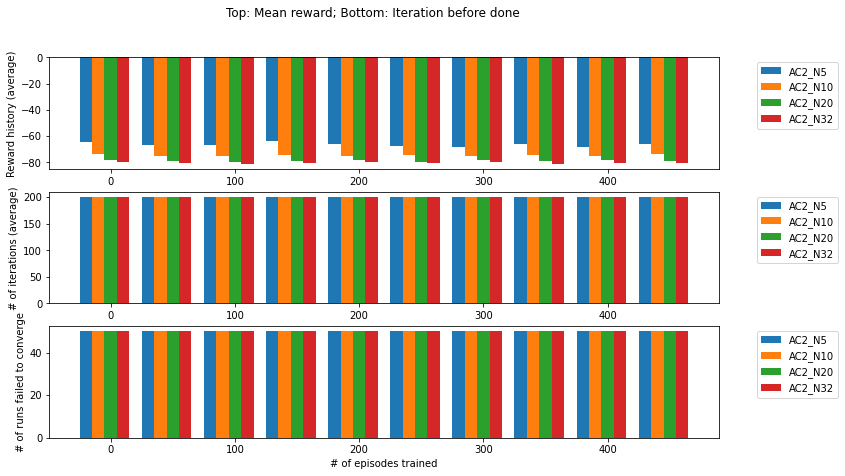

In [138]:
# plot_reward_hist(AC2_hist, test_interval, 
#                  ['AC2_N{0}'.format(N_) for N_ in N_list]+['AC2_N10'], 
#                  log=False, num_iteration=num_iteration, N_list=([np.sqrt(N) for N in N_list]+[np.sqrt(10)])*2)
plot_reward_hist(AC2_hist, test_interval, 
                 ['AC2_N{0}'.format(N_) for N_ in N_list[:4]], 
                 log=False, num_iteration=num_iteration, N_list=([N for N in N_list[:4]]))

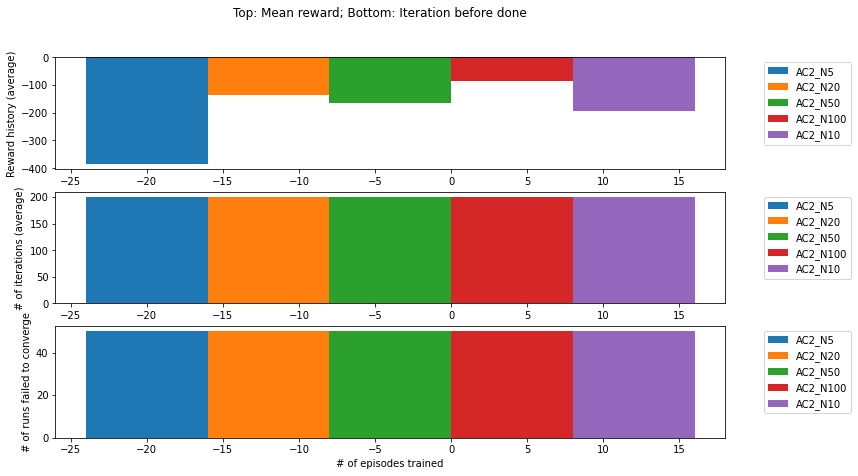

In [150]:
plot_reward_hist([[l] for l in AC2_test_hist], test_interval, 
                 ['AC2_N{0}'.format(N_) for N_ in N_list]+['AC2_N10'], 
                 log=False, num_iteration=num_iteration, N_list=([N for N in N_list]+[10])*2)

In [187]:
# Test out Actor-Critic methods. Note that tuning parameters might be required.
reload(utils.ReplayMemory)
reload(utils.networks)
reload(utils.agents)
reload(utils.plotting)
reload(utils.train_test_methods)
from utils.ReplayMemory import * 
from utils.networks import *
from utils.agents import *
from utils.plotting import *
from utils.train_test_methods import *

num_episode=2#500#1#500
test_interval=50
num_test=0#50#0#50
num_iteration=10#200#10#200
BATCH_SIZE=128
debug=False
num_sample=50

AC2_list_exp = []
for i,N_ in enumerate([5,10]):
    AC2_list_exp.append(
#         AC2Agent(device, N_, env_list[i].no, env_list[i].na, hidden, 
#                  learning_rateA=0.01, learning_rateC=0.02)
#         AC3Agent(device, N_, env_list[i].no, env_list[i].na, hidden, 
#                  learning_rateA=0.01, learning_rateC=0.02)
        DDPGAgent(device, N_, env_list[i].no, env_list[i].na, hidden)
    )

AC2_hist_exp = []
for i,N_ in enumerate([5,10]):
    AC2_hist_exp.append(
        train(AC2_list_exp[i], env_list[i], 
              num_episode, test_interval, num_test, num_iteration, BATCH_SIZE, num_sample, [-1,1], debug, 
                   seed=seed, reward_mode=FUTURE_REWARD_YES_NORMALIZE)
#                    seed=seed, reward_mode=FUTURE_REWARD_YES)
    )
    print("Finished training env with {0} agents for AC".format(N_))

AC2_test_hist_exp = []
for i,N_ in enumerate([5,10]):
    AC2_test_hist_exp.append(
        plot_test(AC2_list_exp[i], env_list[i], fnames=['']*num_test,
            num_iteration=num_iteration, action_space=action_space, imdir='screencaps/',debug=debug)
    )
    print("Finished testnig env with {0} agents for AC".format(N_))


Test result at episode  0 : 
[]
Last  layer Critic gradients after backward:  tensor(4.3827e-05)
Mid   layer Critic gradients after backward:  tensor(0.0004)
Front layer Critic gradients after backward:  tensor(-0.0423)
Last  layer Actor gradients after backward:  tensor(-4.1860e-07)
Mid   layer Actor gradients after backward:  tensor(-3.7676e-06)
Front layer Actor gradients after backward:  tensor(-0.0002)
Last  layer Critic gradients after backward:  tensor(-0.0029)
Mid   layer Critic gradients after backward:  tensor(-0.0070)
Front layer Critic gradients after backward:  tensor(-0.2248)
Last  layer Actor gradients after backward:  tensor(6.2993e-07)
Mid   layer Actor gradients after backward:  tensor(4.1447e-05)
Front layer Actor gradients after backward:  tensor(-0.0260)
Last  layer Critic gradients after backward:  tensor(0.0005)
Mid   layer Critic gradients after backward:  tensor(-0.0002)
Front layer Critic gradients after backward:  tensor(-0.0233)
Last  layer Actor gradients a

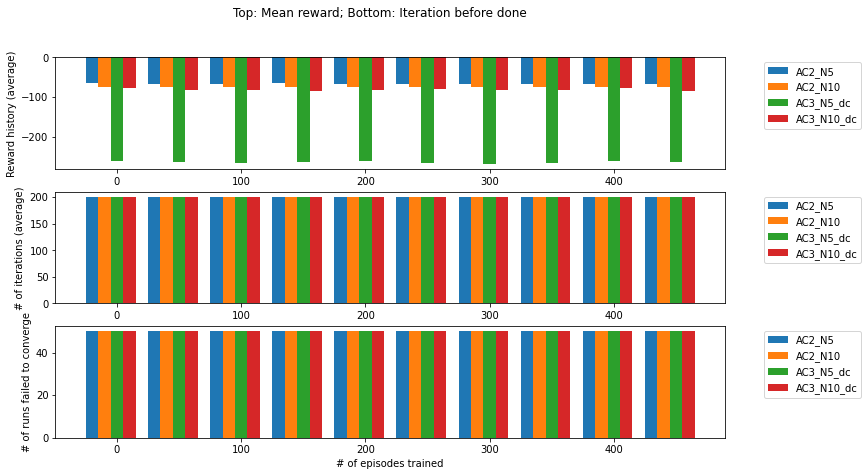

In [175]:
plot_reward_hist(AC2_hist[:2]+AC2_hist_exp, test_interval, 
                 ['AC2_N5', 'AC2_N10', 'AC3_N5_dc', 'AC3_N10_dc'], 
                 log=False, num_iteration=num_iteration, N_list=[5,10,5,10])

In [176]:
AC2_list_exp[0].save_model("AC3_messingaround_N5")
AC2_list_exp[1].save_model("AC3_messingaround_N10")

Saving model to models/AC3Agent_AC3_messingaround_N5


AttributeError: 'AC3Agent' object has no attribute 'net'

### DDPG

In [ ]:
reload(utils.agents)
from utils.agents import *

num_episode=500
test_interval=50
num_test=50
num_iteration=200
BATCH_SIZE=128
debug=False
num_sample=50

# Do DDPG
DDPG_list = []
for i,N_ in enumerate(N_list):
    DDPG_list.append(
        DDPGAgent(device, N_, env_list[i].no, env_list[i].na, hidden)
    )
DDPG_list.append(
    DDPGAgent(device, 10, env.no, env.na, hidden)
)

DDPG_hist = []
for i,N_ in enumerate(N_list):
    DDPG_hist.append(
        train(DDPG_list[i], env_list[i], 
              num_episode, test_interval, num_test, num_iteration, BATCH_SIZE, num_sample, [-1,1], debug)
    )
    print("Finished training env with {0} agents for AC".format(N_))
DDPG_hist.append(
    train(DDPG_list[-1], env, 
          num_episode, test_interval, num_test, num_iteration, BATCH_SIZE, num_sample, [-1,1], debug)
)
    
DDPG_test_hist = []
for i,N_ in enumerate(N_list):
    DDPG_test_hist.append(
        plot_test(DDPG_list[i], env_list[i], fnames=['']*num_test,
            num_iteration=num_iteration, action_space=action_space, imdir='screencaps/', debug=debug)
    )
    print("Finished testnig env with {0} agents for AC".format(N_))
DDPG_test_hist.append(
    plot_test(DDPG_list[-1], env, fnames=['']*num_test,
        num_iteration=num_iteration, action_space=action_space, imdir='screencaps/', debug=debug)
)

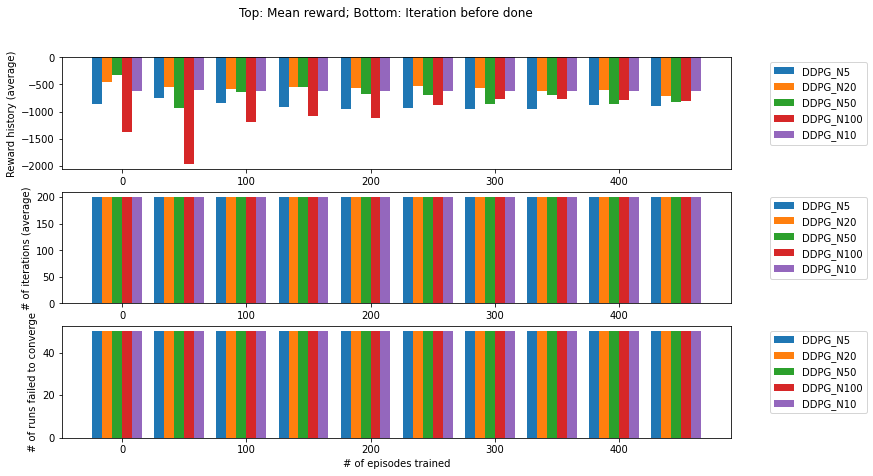

In [154]:
plot_reward_hist(DDPG_hist, test_interval, 
                 ['DDPG_N{0}'.format(N_) for N_ in N_list]+['DDPG_N10'], 
                 log=False, num_iteration=num_iteration, N_list=([np.sqrt(N) for N in N_list]+[np.sqrt(10)])*2)

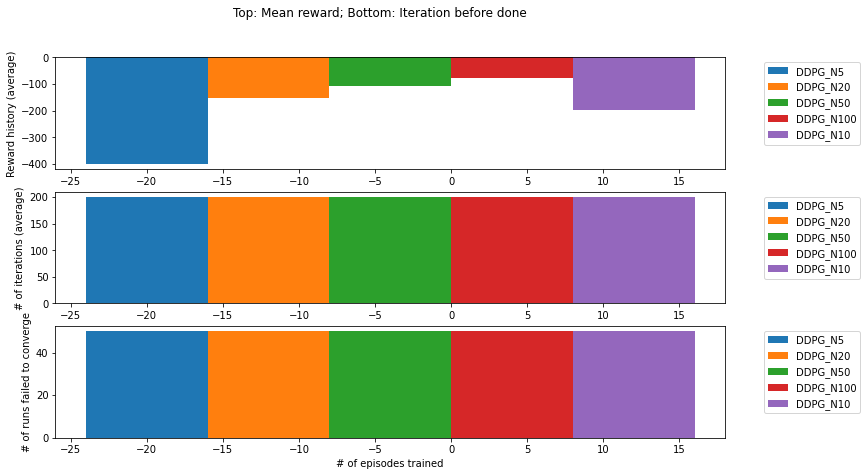

In [140]:
plot_reward_hist([[l] for l in DDPG_test_hist], test_interval, 
                 ['DDPG_N{0}'.format(N_) for N_ in N_list]+['DDPG_N10'], 
                 log=False, num_iteration=num_iteration, N_list=([N for N in N_list]+[10])*2)

In [151]:

def save_model(agent, suffix="", agent_path=None):
    if not os.path.exists('models/'):
        os.makedirs('models/')

    if len(suffix) <= 0:
        suffix = datetime.now().strftime('%Y_%m_%d_%H_%M_%S')
    if agent_path is None:
        agent_path = "models/{}_{}".format(agent.name, suffix)
    print('Saving model to {}'.format(agent_path))
    torch.save(agent.netA.state_dict(), agent_path+"_A")
    torch.save(agent.netC.state_dict(), agent_path+"_C")
    
for i,N_ in enumerate(N_list+[10]):
    save_model(AC2_list[i],'AC2_test2_N{0}'.format(N_))
    
def save_model(agent, suffix="", agent_path=None):
    if not os.path.exists('models/'):
        os.makedirs('models/')

    if len(suffix) <= 0:
        suffix = datetime.now().strftime('%Y_%m_%d_%H_%M_%S')
    if agent_path is None:
        agent_path = "models/{}_{}".format(agent.name, suffix)
    print('Saving model to {}'.format(agent_path))
    torch.save(agent.netA.state_dict(), agent_path+"_A")
    torch.save(agent.netC.state_dict(), agent_path+"_C")
    torch.save(agent.netAT.state_dict(), agent_path+"_AT")
    torch.save(agent.netCT.state_dict(), agent_path+"_CT")
    
for i,N_ in enumerate(N_list+[10]):
    save_model(DDPG_list[i],'DDPG_test2_N{0}'.format(N_))

Saving model to models/AC2Agent_AC2_test2_N5
Saving model to models/AC2Agent_AC2_test2_N20
Saving model to models/AC2Agent_AC2_test2_N50
Saving model to models/AC2Agent_AC2_test2_N100
Saving model to models/AC2Agent_AC2_test2_N10
Saving model to models/DDPGAgent_DDPG_test2_N5
Saving model to models/DDPGAgent_DDPG_test2_N20
Saving model to models/DDPGAgent_DDPG_test2_N50
Saving model to models/DDPGAgent_DDPG_test2_N100
Saving model to models/DDPGAgent_DDPG_test2_N10


### Play around with the gradient agent

In [81]:
# Play around with the gradient agent
N = 10
GA = GradientAgent(device, 10, ns, hidden)
GA.load_model('models/GradientAgent_test3_GA')

Loading model from models/GradientAgent_test3_GA


In [168]:
# Test model
class GradientAgentTest(BaseAgent):
    def __init__(self, device, N, ns=2, hidden=24, action_range=[-1,1], learning_rate=0.01, centralized=False):
        super().__init__(device, N)
        self.centralized = centralized
        if centralized:
            pass
        else:
            self.net = EnergyNet(N, 2, hidden)
        self.optimizer = torch.optim.RMSprop(self.net.parameters(), lr=learning_rate)
        self.needsExpert = True
        self.name = 'GradientAgentTest'
        self.range = action_range[1] - action_range[0]
        self.offset = 0.5*(action_range[0]+action_range[1])
        self.na = 2
    
    def getNextState(self, observed_state, action, dt=0.01):
        # Input: observed_state is a (M,2+,N) array, and action is (M,2). Each agent corresponds to a row.
        # Output: Supposedly, a (M,2,N) array that contains the expected new observed state.
        # Right now we're manually giving the agent a sense of its own dynamics with velocity input (single integrator)...
        # Hopefully it could go automatically soon.
        # Limitation: Doens't know if 0 means "not observed" or "already together". By default we assume the first. 
        # Thus, we first get a M*N matrix that records the neighbor information
        M,_,N = observed_state.shape
        is_neighbor = np.zeros((M,N))
        is_neighbor[ (observed_state[:,0,:]!=0) & (observed_state[:,1,:]!=0) ] = 1
        # Next, find the new relative distances based on the action. Assuming action means velocity, and we use a small dt.
        new_dists = observed_state[:,:2,:] - dt * action.reshape(M,2,1) # Broadcast action (M,2) to (M,2,N)
        # Filter out unobserved states
        new_dists *= is_neighbor.reshape(M,1,N)
        return new_dists
    
    def getEnergy(self, observed_state):
        # This is the expert that finds the energy function for each agent, but shhh don't let the rest know
        # Input: observed_state, expecting shape to be (N,no,N), as per the current environment, and be full of distance norms
        # Output: Probably (N,1), one for each agent. Let's make it only dependent on position for now; use velocity later.
        sum_dists = np.sum(np.linalg.norm(observed_state[:,:2,:], ord=2, axis=1), axis=1)
        print("Energy function says: ", sum_dists)
        return sum_dists
    
    # Picks an action based on given state.
    def select_action(self, state, **kwargs):
        # Input shape: state has shape (ns,N)
        with torch.no_grad():
            # Find gradients in both action space directions
            dt = 0.01
            da = 0.1
            sample_ax1p = self.getNextState(state.view(1,-1,self.N).detach().numpy(), np.array([[da,0]]).astype('float32'), dt) # Now shape: (1,2,N)
            sample_ax1n = self.getNextState(state.view(1,-1,self.N).detach().numpy(), np.array([[-da,0]]).astype('float32'), dt)
            sample_ax1p = self.net(torch.from_numpy(sample_ax1p)).squeeze().detach().numpy()
            sample_ax1n = self.net(torch.from_numpy(sample_ax1n)).squeeze().detach().numpy()
            sample_ax2p = self.net(
                torch.from_numpy(self.getNextState(state.view(1,-1,self.N).detach().numpy(), 
                                np.array([[0,da]]).astype('float32'), dt))).squeeze().detach().numpy()
            sample_ax2n = self.net(
                torch.from_numpy(self.getNextState(state.view(1,-1,self.N).detach().numpy(), 
                                np.array([[0,-da]]).astype('float32'), dt))).squeeze().detach().numpy()
            print("Action-induced values in each direction: \n", sample_ax1p,sample_ax1n, sample_ax2p,sample_ax2n)
            # Calculate approximate gradient
            action_dir = np.array([(sample_ax1p-sample_ax1n), (sample_ax2p-sample_ax2n)])*2/da/dt
#             print(action_dir)
            return np.clip(action_dir, -1,1)
    
    # Steps over gradients from memory replay
    def optimize_model(self, batch, **kwargs):
        B = kwargs.get('B', len(batch))
        # This class would assume that the optimal action is stored in batch input
        state_batch = torch.cat(batch.state)
        
        # Find loss & optimize the model
        self.net.train() 
        pred_energy = self.net(state_batch.view(B, -1, self.N)[:,:2,:]).squeeze() # Input shape should be (B,no,N) and output be (B,1)
        energy = torch.from_numpy(self.getEnergy(state_batch.view(B, -1, self.N).detach().numpy()))
        print("Actual energy = ", energy, " vs predicted energy = ", pred_energy)

        self.optimizer.zero_grad()
        loss = torch.nn.functional.mse_loss(energy, pred_energy)
        print(loss)
        loss.backward()
        self.optimizer.step()


In [169]:
def train_gradient(agent, env, num_episode=50, test_interval=25, num_test=20, num_iteration=200, 
          BATCH_SIZE=128, num_sample=50, action_space=[-1,1], debug=True, memory=None, seed=2020,
          update_mode=UPDATE_PER_EPISODE, reward_mode=FUTURE_REWARD_NO, gamma=0.99):
    test_hists = []
    steps = 0
    if memory is None:
        memory = ReplayMemory(1000 * env.N)
    
    # Values that would be useful
    N = env.N
    # Note that the seed only controls the numpy random, which affects the environment.
    # To affect pytorch, refer to further documentations: https://github.com/pytorch/pytorch/issues/7068
    np.random.seed(seed)
    test_seeds = np.random.randint(0, 5392644, size=(num_episode // test_interval)+1)

    for e in range(num_episode):
        steps = 0
        state = env.reset()
        state = torch.from_numpy(state).float()
        state = Variable(state)

        # Train History
        state_pool = []
        action_pool = []
        reward_pool = []
        next_state_pool = []

        for t in range(num_iteration):
            # agent.net.train()
            agent.set_train(True)
            # Try to pick an action, react, and store the resulting behavior in the pool here
            actions = []
            for i in range(N):
                action = agent.select_action(state[i], **{
                    'steps_done':t, 'num_sample':50, 'action_space':action_space
                })
                actions.append(action)
            action = np.array(actions).T # Shape would become (2,N)
            print("Agent's choice: ", action)

            next_state, reward, done, _ = env.step(action)
            print("After taking action ", action, " at state ", state, " with shape ", state.shape, ": ")
            print("True next state: ", next_state, "\n with shape = ", next_state.shape)
            print("Predicted next state: ", agent.getNextState(
                state.detach().numpy(), action, env.dt
            ))
            next_state = Variable(torch.from_numpy(next_state).float()) # The float() probably avoids bug in net.forward()
            action = action.T # Turn shape back to (N,2)

            if agent.needsExpert:
                # If we need to use expert input during training, then we consult it and get the best action for this state
                actions = env.controller()
                action = actions.T # Shape should already be (2,N), so we turn it into (N,2)
                print("In comparison, environment best action: ", action)
            
            if reward_mode == FUTURE_REWARD_NO:
                # Push everything directly inside if we don't use future discounts
                for i in range(N):
                    memory.push(state[i], action[i], next_state[i], reward[i])
            else:
                # Store and push them outside the loop
                state_pool.append(state)
                action_pool.append(action)
                reward_pool.append(reward)
                next_state_pool.append(next_state)
            
            state = next_state
            steps += 1
            
            if done:
                print("Took ", t, " steps to converge")
                break
        
        if reward_mode == FUTURE_REWARD_YES:
            for j in range(len(reward)):
                if j > 0:
                    reward_pool[-j-1] += gamma * reward_pool[-j]
                for i in range(N):
                    memory.push(state_pool[-j-1][i], action_pool[-j-1][i], 
                                next_state_pool[-j-1][i], reward_pool[-j-1][i])
                
        # Update 1028: Moved this training step outside the loop
        if len(memory) >= BATCH_SIZE:
            transitions = memory.sample(BATCH_SIZE)
            batch = Transition(*zip(*transitions))
            agent.optimize_model(batch, **{'B':BATCH_SIZE})
            
        if e % test_interval == 0:
            print("Test result at episode ", e, ": ")
            test_hist = test(agent, env, num_test, num_iteration, num_sample, action_space, 
                             seed=test_seeds[int(e/test_interval)], debug=debug)
            test_hists.append(test_hist)
    env.close()
    return test_hists

In [170]:
# Run for one step and check the intermediate values
gat = GradientAgentTest(device, 10, env.no, hidden=32, action_range=[-1,1], learning_rate=0.01, centralized=False)
gat.load_model('models/GradientAgent_test3_GA')

Loading model from models/GradientAgent_test3_GA


In [171]:
train_gradient(gat, env, num_episode=5, test_interval=25, num_test=2, num_iteration=5, seed=2020)

Action-induced values in each direction:  -0.00025314093 -0.00012302399
Action-induced values in each direction:  -0.00016826391 -0.00025177002
Action-induced values in each direction:  -0.000623405 -0.00040477514
Action-induced values in each direction:  -0.00041168928 -0.00023698807
Action-induced values in each direction:  -0.00016957521 -0.00059759617
Action-induced values in each direction:  -0.0004515648 -0.0002681017
Action-induced values in each direction:  -0.00032031536 -0.0005813837
Action-induced values in each direction:  -0.000113904476 -0.0007010102
Action-induced values in each direction:  -0.0005123615 -5.465746e-05
Action-induced values in each direction:  -7.688999e-05 -0.00043213367
Agent's choice:  [[-0.50628185 -0.33652782 -1.         -0.82337856 -0.33915043 -0.9031296
  -0.6406307  -0.22780895 -1.         -0.15377998]
 [-0.24604797 -0.50354004 -0.8095503  -0.47397614 -1.         -0.5362034
  -1.         -1.         -0.10931492 -0.86426735]]
After taking action  [

IndexError: list index out of range

In [86]:
env.nf

4

In [122]:
a = np.arange(10).reshape((2,5))
np.clip(a,2,9)
# np.clip(a, np.array([[2,8]]).T, np.array([[4,9]]).T)

array([[2, 2, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [50]:
# state_batch = torch.cat(batch.state)
# bs = np.asarray(batch.state)
torch.cat([s for s in batch.state])

tensor([[-1.1780,  0.0162, -1.4030, -2.1048,  0.0000],
        [-0.8565, -1.3593, -1.3299, -1.3903,  0.0000],
        [-1.2942,  0.0000, -1.4692, -2.0210, -0.1162],
        ...,
        [ 0.0000, -0.1528, -0.1734, -0.1338,  1.0065],
        [ 0.0000,  1.2942, -0.1250, -0.7268,  1.2280],
        [ 0.0000, -0.3528, -0.2734, -0.1838,  0.9565]])

In [70]:
np.arange(24).reshape(2,3,4) - np.expand_dims(np.arange(6).reshape(2,3,1),axis=1)

array([[[[ 0,  1,  2,  3],
         [ 3,  4,  5,  6],
         [ 6,  7,  8,  9]],

        [[12, 13, 14, 15],
         [15, 16, 17, 18],
         [18, 19, 20, 21]]],


       [[[-3, -2, -1,  0],
         [ 0,  1,  2,  3],
         [ 3,  4,  5,  6]],

        [[ 9, 10, 11, 12],
         [12, 13, 14, 15],
         [15, 16, 17, 18]]]])

In [72]:
np.arange(24).reshape(2,3,4) * np.arange(8).reshape(2,1,4)

array([[[  0,   1,   4,   9],
        [  0,   5,  12,  21],
        [  0,   9,  20,  33]],

       [[ 48,  65,  84, 105],
        [ 64,  85, 108, 133],
        [ 80, 105, 132, 161]]])

In [59]:
savs = policy_net(state_batch.view(BATCH_SIZE, -1, N))

In [11]:
img = env.render(mode="rgb_array")

In [13]:
img.shape

(800, 1200, 3)

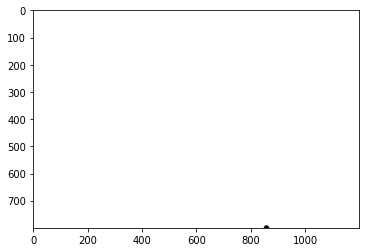

In [19]:
plt.imshow(img)
plt.savefig('test.jpg')

In [18]:
plt.savefig('test.jpg')

<Figure size 432x288 with 0 Axes>

In [113]:
np.asarray(reward).astype('float32').dtype

dtype('float32')

In [ ]:
def plot_durations():
    plt.figure(2)
    plt.clf()
    durations_t = torch.FloatTensor(episode_durations)
    plt.title('Training...')
    plt.xlabel('Episode')
    plt.ylabel('Duration')
    plt.plot(durations_t.numpy())
    # Take 100 episode averages and plot them too
    if len(durations_t) >= 100:
        means = durations_t.unfold(0, 100, 1).mean(1).view(-1)
        means = torch.cat((torch.zeros(99), means))
        plt.plot(means.numpy())

    plt.pause(0.001)  # pause a bit so that plots are updated